<a href="https://colab.research.google.com/github/maimonahST/ComputerVision/blob/main/CV_Project_with_explaination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

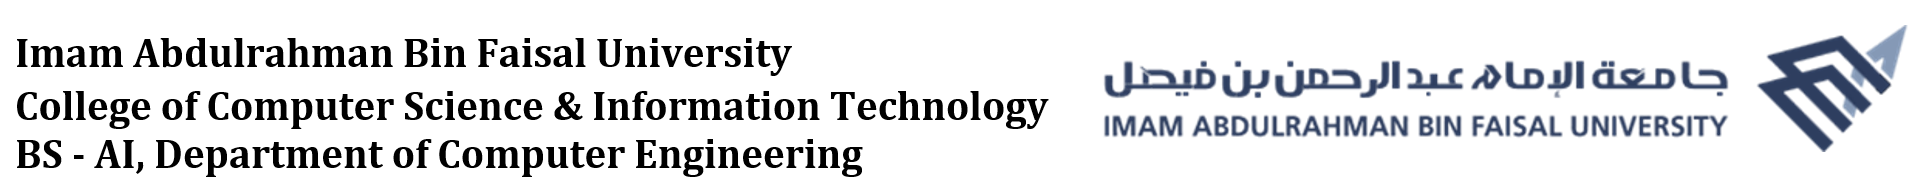

# **Hand Gesture Recognition**

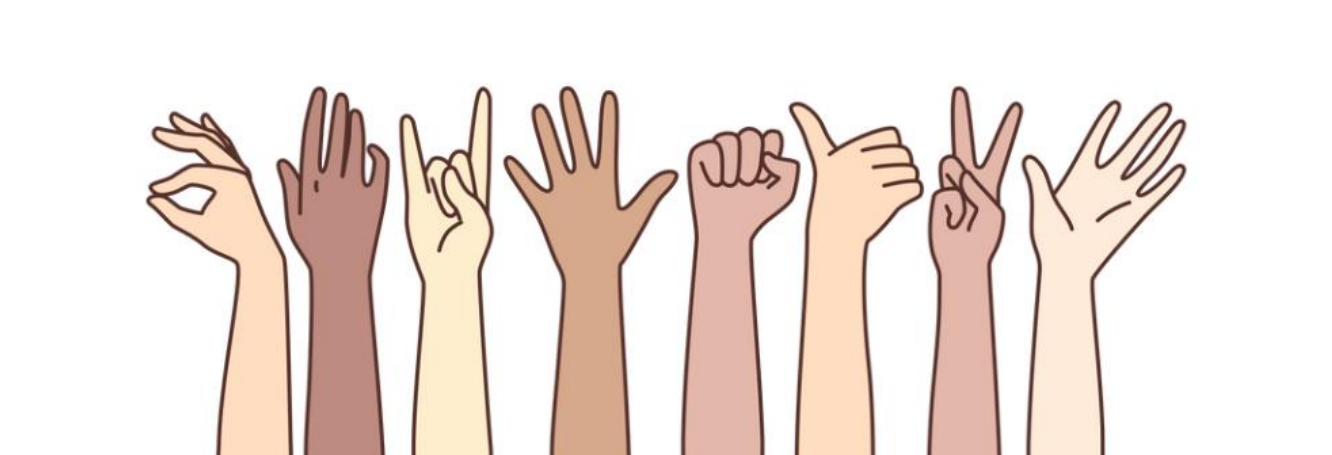

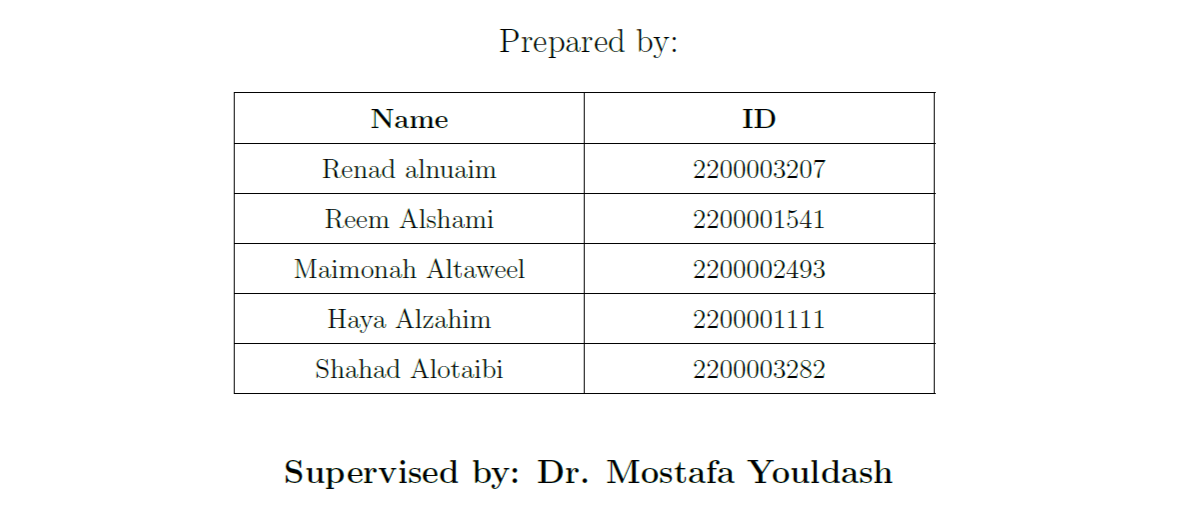

## **Introduction**

Hand gesture recognition is a compelling application of computer vision, which has seen significant advancements due to the progress in deep learning techniques and the accessibility of high-quality datasets. The ability to recognize hand gestures accurately can be transformative in various fields, including human-computer interaction, assistive technologies for the hearing impaired, augmented reality, and robotics.

In this project, we will develop a hand gesture recognition model using TensorFlow and TensorFlow Hub. Our approach will employ the MobileNetV2 architecture, a powerful convolutional neural network (CNN) known for its efficiency and accuracy. By fine-tuning this pre-trained model on the ["Hand Gesture Recognition Database"](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data) dataset sourced from Kaggle, we aim to achieve high accuracy in classifying specific hand gestures.

Notably, the model will be developed incrementally. We will conduct a series of experiments where, in each successive experiment, we will increase the number of hand gestures included in the training set and re-evaluate the model's performance. This iterative approach will continue until the model can effectively classify all the hand gestures in the ["Hand Gesture Recognition Database"](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data) dataset.

As a brief background, the utilized dataset contains a total of 10 gestures; namely, "C", "palm_moved", "index", "OK", "down", "fist", "L", "palm", "fist_moved", and "thumb". These are displayed in order from left to right in the following image.

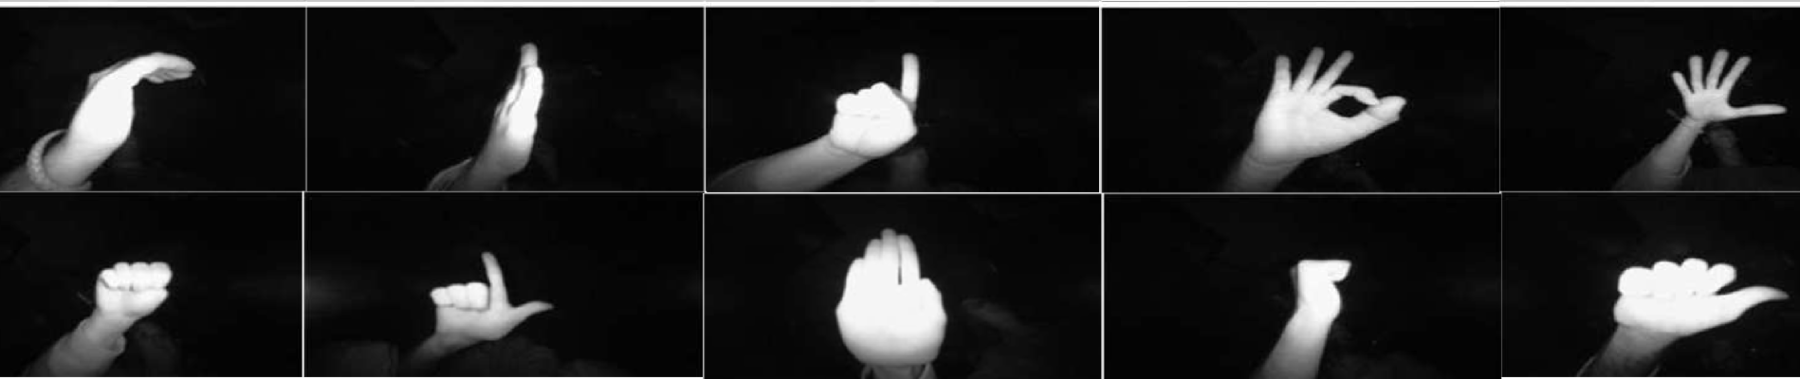

## **Implementation**

### **Download and Extract the Data Source**

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'leapgestrecog:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F39466%2F61155%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T212046Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2dd5ffcc3ccfc33bc060b18147b2312756ecc3af8f3dcef81f5d72507203751f028bf381c488eeca30f4368c3222fbef614ba0a0fc0c963fa2c4f6b8c7ff7ffbd811aab2415b0b36405bd24b7990d140c9516d37e350f3642285329d6189dd64ffba42ced1f4b90bb5070f12ab0ee9dd3b3c14714ba1657fd489872565fb158d83e40a3f52757ace46119735828f2d1f334ff12fa7b0a5deb4a4cd4ff29f6ebf12b6fa146b439fee1a4331ab9981aa4bec56d7f58344196ada527adf7b7ed329a2fcaa63cbacddbbbc10ffc68003fb19987a32e3907fe322c03be1306e94b3224559b8a105ff7b91153025fb5da14070185ab9e50233dd6498a11bdcc3bf4a45,mobilenet-v2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5016327%2F8424793%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T212046Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9d77eff8c86711918df0809d1224ab4207905f9cfadf082b0663765dbdf20d454294227b3b1e28cc56e812dff4533acacde24fc05b376a6a61aa0b0b240b2c09b570b7ea5f28f3faec5253649e128e1faeee62c9907e2dca29134d32858eaa9c005a84b17bc99ae04df7e9b0b06c66b6d03899f9681c7593dba3632f17bb1ee754045c17c1852092b3e6835d12ff372276cd37602e8d0cbe5e69a1bcdc37204a0533a7e9a1e3780060b018c83ecb62e8164bedbeb9d5f852660b85f467cc850015ef82b2562de5f1e09948684c5e2b7e8c1493214f7b59b5c82940d781ada55fb806a5540f8aa1318b6c56cc19bbe2cce0da69590b3cb022a14a33c7dc54b009'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2286085038 bytes downloaded
Downloaded and uncompressed: leapgestrecog
[==================================================] 8442202 bytes downloaded
Downloaded and uncompressed: mobilenet-v2
Data source import complete.


### **Define Necessary Functions**

In this step, we define several utility functions that are essential for handling and preprocessing the dataset for our hand gesture recognition model.

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2

# Function to load data
def load_data_path(target_classes, dataset_path):
    X = []
    y = []
    # Iterate over inner folders
    for inner_folder in os.listdir(dataset_path):
        inner_folder_path = os.path.join(dataset_path, inner_folder)
        if os.path.isdir(inner_folder_path):
            # Iterate over target classes within each inner folder
            for label, gesture in enumerate(target_classes):
                gesture_dir = os.path.join(inner_folder_path, gesture)
                if os.path.isdir(gesture_dir):
                    for root, _, files in os.walk(gesture_dir):
                        for file in files:
                            if file.endswith('.png'):
                                file_path = os.path.join(root, file)
                                X.append(file_path)
                                y.append(label)
    return X, y


# Function to preprocess images
def preprocess_image(file_path):
    image = cv2.imread(file_path)
    resized_image = cv2.resize(image, (250, 250), interpolation=cv2.INTER_AREA)
    resized_image[resized_image < 90] = 255
    blur_image = cv2.GaussianBlur(resized_image, (7, 7), 0)
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened_image = cv2.filter2D(blur_image, -1, kernel)
    return sharpened_image



# Function to save images in respective directories
def save_images(X, y, dataset_type):
    for num, (img, label) in enumerate(zip(X, y)):
        label_dir = os.path.join(base_dir, f'images/{dataset_type}/{target_classes[label]}')
        os.makedirs(label_dir, exist_ok=True)
        save_path = os.path.join(label_dir, f'img{num}.png')
        cv2.imwrite(save_path, img)



# Function to load images from a directory
def load_images_from_dir(directory, target_classes, target_size=(250, 250)):
    images = []
    labels = []
    for label, class_name in enumerate(target_classes):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file)
                image = cv2.imread(file_path)
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)


def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

### **First Experiment: Binary Classification ( 2 Gestures )**

In the first experiment, we train the model to classify only 2 hand gestures, which are "fist" and "OK".

#### **Load and Preprocess the Data**

In [ ]:
# Define the path to the dataset
dataset_path = '/kaggle/input/leapgestrecog/leapGestRecog/'

# Define the target classes
target_classes = ['03_fist', '07_ok']

# Load the data
X, y = load_data_path(target_classes, dataset_path)

In [ ]:
# Print the length of X and y
print(len(X), len(y))

4000 4000


In [ ]:
# Print the unique values of y
unique_labels = set(y)
print("Unique values of y:", unique_labels)

Unique values of y: {0, 1}


After loading the image data, we perform a series of image processing steps on a sample image and visualize the results at each step. The applied operations include resizing, thresholding, blurring, and sharpening the image, with the final results displayed side-by-side for comparison.

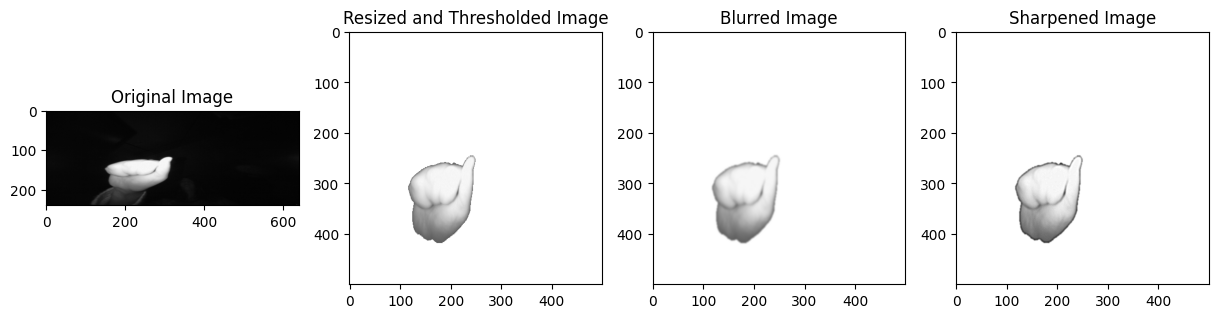

In [ ]:
# Preprocess a sample image
sample_image_path = X[0]

# Read the image from the provided path
original_image = cv2.imread(sample_image_path)

# Resize the image to 500x500 pixels
resized_image = cv2.resize(original_image, (500, 500), interpolation=cv2.INTER_AREA)

# Apply thresholding by setting pixel values less than 90 (dark) to 255 (white) to make the background (anything other than the hand) white, making the gesture more clear
resized_image[resized_image < 90] = 255

# Apply a Gaussian blur to smooth the image
blur_image = cv2.GaussianBlur(resized_image, (7, 7), 0)

# Apply sharpening to enhance the edges using a convolution filter
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(blur_image, -1, kernel)

# Display the original, resized, blurred, and sharpened image using matplotlib
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized and Thresholded Image')
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.show()

In [ ]:
# Preprocess all images
processed_images = []
for file_path in X:
    processed_images.append(preprocess_image(file_path))


len(processed_images)

4000

#### **Split the data**

In this step, we prepare the dataset for training by converting the data to numpy arrays and splitting it into training, validation, and test sets.
The split ratio is 70% for the training set, 10% for the validation set, and 20% for the test set.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Convert lists to numpy arrays
processed_images = np.array(processed_images)
y = np.array(y)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(processed_images, y, test_size=0.3, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.6666, stratify=y_temp)

In [ ]:
# Print the shape of the image sets of the training, validation, and testing
X_valid = np.array(X_valid)
X_test = np.array(X_test)

X_train.shape, X_valid.shape , X_test.shape

((2800, 250, 250, 3), (400, 250, 250, 3), (800, 250, 250, 3))

In [ ]:
# Print the shape of the labels for the training, validation, and test sets
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

y_train.shape, y_valid.shape , y_test.shape

((2800,), (400,), (800,))

Now, we create directories to organize and store preprocessed images for training, validation, and testing. This enables easy access and management of the dataset during model development and evaluation. In addition, the preprocessed images are saved for each of the sets.

In [ ]:
# Create directories
base_dir = '/kaggle/working/Binary'
os.makedirs(f'{base_dir}/images/train/', exist_ok=True)
os.makedirs(f'{base_dir}/images/val/', exist_ok=True)
os.makedirs(f'{base_dir}/images/test/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/train/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/val/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/test/', exist_ok=True)


# Save preprocessed images for training, validation, and testing
save_images(X_train, y_train, 'train')
save_images(X_valid, y_valid, 'val')
save_images(X_test, y_test, 'test')

#### **Model Building**

In this step, we fine-tune a pre-trained MobileNetV2 model for image classification. Fine-tuning involves initializing the MobileNetV2 model with weights pre-trained on the ImageNet dataset and then adding additional layers on top for the specific classification task, in our case the task is to classify different hand gestures. These additional layers include a dropout layer to prevent overfitting and a dense output layer with softmax activation function. The MobileNetV2 base model is kept trainable, allowing the weights to be updated during training to adapt to the new dataset while leveraging the knowledge learned from ImageNet. Following, the model is compiled with binary crossentropy loss and RMSprop optimizer. Thereafter, the model is trained on the provided dataset for 5 epochs, with data augmentation techniques such as width and height shifting, along with rescaling of pixel values to help ensure genralization and reliabilty.

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is available


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target classes
target_classes = ['03_fist', '07_ok']

# Define model name and handle
model_name = "mobilenet_v2_140_224"
model_handle_map = {
    "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
}
model_image_size_map = {
    "mobilenet_v2_140_224": 224,
}
model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16  # Reduced batch size to conserve memory

# Create the base model from the pre-trained convnets
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Build the model
do_fine_tuning = True
print("Building model with", model_handle)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    Dropout(rate=0.3),
    Dense(len(target_classes), activation='softmax',
          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,) + IMAGE_SIZE + (3,))
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

# Define base directory
base_dir = '/kaggle/working/Binary/images'

# Train generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation generator
validation_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)

Selected model: mobilenet_v2_140_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1792)              4363712   
                                                                 
 dropout_2 (Dropout)         (None, 1792)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 3586      
                                                                 
Total params: 4367298 (16.66 MB)
Trainable params: 4319362 (16.48 MB)
Non-trainable params: 47936 (187.25 KB)
_________________________________________________________________
Found 2800 images belonging to 2 classes.
Found 400 images belonging to

#### **Model Evaluation**

After building the model, we evaluate its performance on the test dataset. The model is evaluated using the "accuracy" metric.

In [ ]:
# Test generator
test_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

Found 800 images belonging to 2 classes.
50/50 - 2s - loss: 0.0883 - accuracy: 1.0000 - 2s/epoch - 36ms/step
Test accuracy: 1.0


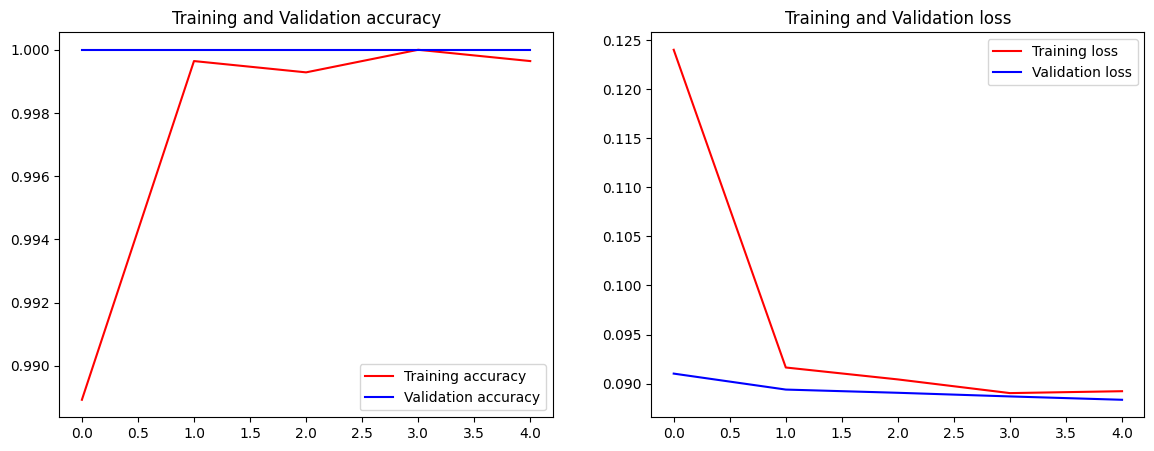

In [ ]:
plot_training_history(history)

50/50 [==============================] - 5s 62ms/step


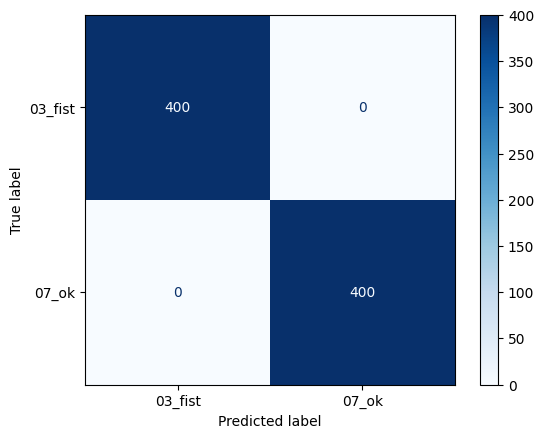

In [ ]:
# Print the confusion matrix

print_confusion_matrix(model, test_generator)

In [ ]:
from sklearn.metrics import classification_report

# Generate and print classification report
def print_classification_report(model, test_generator):
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    y_true = test_generator.classes
    report = classification_report(y_true, y_pred, target_names=target_classes)
    print(report)

print_classification_report(model, test_generator)

50/50 [==============================] - 2s 42ms/step
              precision    recall  f1-score   support

     03_fist       1.00      1.00      1.00       400
       07_ok       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



From the results above, the fine-tuned model had achieved perfect performance in classifying the two hand gestures ( "fist" and "OK" ), with an accuracy of 100%.

### **Second Experiment: Multi-class Classification ( 3 Gestures )**

In the second experiment, we train the model to classify 3 hand gestures, which are "fist", "OK", and "C".

#### **Load and Preprocess the Data**

In [ ]:
# Define the path to the dataset
dataset_path = '/kaggle/input/leapgestrecog/leapGestRecog/'

# Define the target classes
target_classes = ['03_fist', '07_ok', '09_c']

# Load the data
X, y = load_data_path(target_classes, dataset_path)

In [ ]:
# Print the length of X and y
print(len(X), len(y))

6000 6000


In [ ]:
# Print the unique values of y
unique_labels = set(y)
print("Unique values of y:", unique_labels)

Unique values of y: {0, 1, 2}


After loading the image data, we perform a series of image processing steps on a sample image and visualize the results at each step. The applied operations include resizing, thresholding, blurring, and sharpening the image, with the final results displayed side-by-side for comparison.

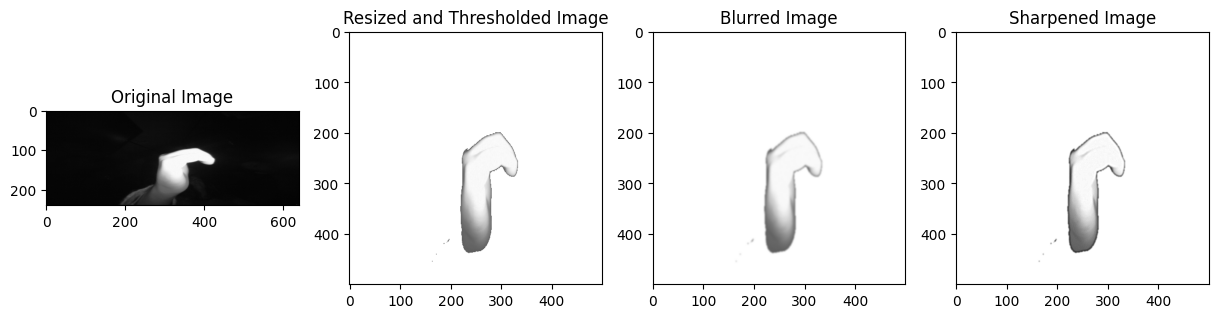

In [ ]:
import matplotlib.pyplot as plt

# Preprocess a sample image
sample_image_path = X[500]

# Read the image from the provided path
original_image = cv2.imread(sample_image_path)

# Resize the image to 500x500 pixels
resized_image = cv2.resize(original_image, (500, 500), interpolation=cv2.INTER_AREA)

# Apply thresholding by setting pixel values less than 90 (dark) to 255 (white) to make the background (anything other than the hand) white, making the gesture more clear
resized_image[resized_image < 90] = 255

# Apply a Gaussian blur to smooth the image
blur_image = cv2.GaussianBlur(resized_image, (7, 7), 0)

# Apply sharpening to enhance the edges using a convolution filter
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(blur_image, -1, kernel)


# Display the original, resized, blurred, and sharpened image using matplotlib
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized and Thresholded Image')
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.show()

In [ ]:
# Preprocess all images
processed_images = []
for file_path in X:
    processed_images.append(preprocess_image(file_path))


len(processed_images)

6000

#### **Split the data**

In this step, we prepare the dataset for training by converting the data to numpy arrays and splitting it into training, validation, and test sets.
The split ratio is 70% for the training set, 10% for the validation set, and 20% for the test set.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Convert lists to numpy arrays
processed_images = np.array(processed_images)
y = np.array(y)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(processed_images, y, test_size=0.3, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.6666, stratify=y_temp) # 20% of the original dataset

In [ ]:
# Print the shape of the image sets of the training, validation, and testing
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)

X_train.shape, X_valid.shape , X_test.shape

((4200, 250, 250, 3), (600, 250, 250, 3), (1200, 250, 250, 3))

In [ ]:
# Print the shape of the labels for the training, validation, and test sets
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

y_train.shape, y_valid.shape , y_test.shape

((4200,), (600,), (1200,))

Now, we create directories to organize and store preprocessed images for training, validation, and testing. This enables easy access and management of the dataset during model development and evaluation. In addition, the preprocessed images are saved for each of the sets.

In [ ]:
# Create directories
base_dir = '/kaggle/working/Three_classes'
os.makedirs(f'{base_dir}/images/train/', exist_ok=True)
os.makedirs(f'{base_dir}/images/val/', exist_ok=True)
os.makedirs(f'{base_dir}/images/test/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/train/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/val/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/test/', exist_ok=True)


# Save preprocessed images for training, validation, and testing
save_images(X_train, y_train, 'train')
save_images(X_valid, y_valid, 'val')
save_images(X_test, y_test, 'test')

In [ ]:
import os
import cv2
import numpy as np

# Define the target classes
target_classes = ['03_fist', '07_ok', '09_c']

# Define base directory
base_dir = '/kaggle/working/your-dataset'

# Load images from directories
X_train, y_train = load_images_from_dir(os.path.join(base_dir,target_classes, 'images/train'))
X_valid, y_valid = load_images_from_dir(os.path.join(base_dir,target_classes, 'images/val'))
X_test, y_test = load_images_from_dir(os.path.join(base_dir,target_classes, 'images/test'))

#### **Model Building**

In this step, we fine-tune a pre-trained MobileNetV2 model for image classification. Fine-tuning involves initializing the MobileNetV2 model with weights pre-trained on the ImageNet dataset and then adding additional layers on top for the specific classification task, in our case the task is to classify different hand gestures. These additional layers include a dropout layer to prevent overfitting and a dense output layer with softmax activation function. The MobileNetV2 base model is kept trainable, allowing the weights to be updated during training to adapt to the new dataset while leveraging the knowledge learned from ImageNet. Following, the model is compiled with categorical crossentropy loss and RMSprop optimizer. Thereafter, the model is trained on the provided dataset for 10 epochs, with data augmentation techniques such as width and height shifting, along with rescaling of pixel values to help ensure genralization and reliabilty.

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is available


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target classes
target_classes = ['03_fist', '07_ok', '09_c']

# Define model name and handle
model_name = "mobilenet_v2_140_224"
model_handle_map = {
    "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
}
model_image_size_map = {
    "mobilenet_v2_140_224": 224,
}
model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16  # Reduced batch size to conserve memory

# Create the base model from the pre-trained convnets
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Build the model
do_fine_tuning = True
print("Building model with", model_handle)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    Dropout(rate=0.3),
    Dense(len(target_classes), activation='softmax',
          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,) + IMAGE_SIZE + (3,))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

# Define base directory
base_dir = '/kaggle/working/Three_classes/images'

# Train generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation generator
validation_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)

Selected model: mobilenet_v2_140_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1792)              4363712   
                                                                 
 dropout_1 (Dropout)         (None, 1792)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 5379      
                                                                 
Total params: 4369091 (16.67 MB)
Trainable params: 4321155 (16.48 MB)
Non-trainable params: 47936 (187.25 KB)
_________________________________________________________________
Found 4200 images belonging to 3 classes.
Found 600 images belonging to

#### **Model Evaluation**

After building the model, we evaluate its performance on the test dataset. The model is evaluated using the "accuracy" metric.

Found 1200 images belonging to 3 classes.
75/75 - 4s - loss: 0.0858 - accuracy: 1.0000 - 4s/epoch - 55ms/step
Test accuracy: 1.0


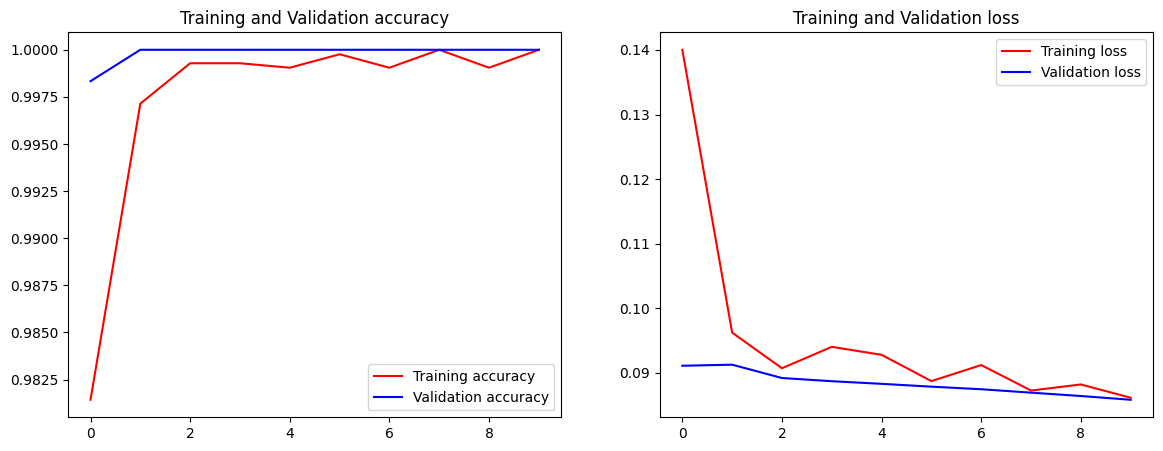

In [ ]:
# Test generator
test_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

plot_training_history(history)

75/75 [==============================] - 3s 39ms/step


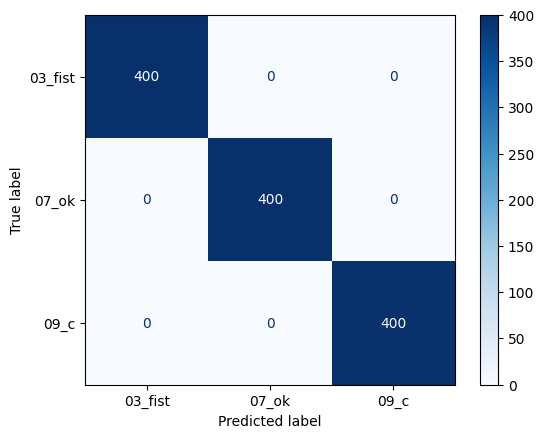

In [ ]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def print_confusion_matrix(model, test_generator):
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    y_true = test_generator.classes
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

print_confusion_matrix(model, test_generator)


In [ ]:
from sklearn.metrics import classification_report

# Generate and print classification report
def print_classification_report(model, test_generator):
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    y_true = test_generator.classes
    report = classification_report(y_true, y_pred, target_names=target_classes)
    print(report)

print_classification_report(model, test_generator)

75/75 [==============================] - 3s 37ms/step
              precision    recall  f1-score   support

     03_fist       1.00      1.00      1.00       400
       07_ok       1.00      1.00      1.00       400
        09_c       1.00      1.00      1.00       400

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



From the results above, the fine-tuned model had achieved perfect performance in classifying the three hand gestures ( "fist", "OK", and "C" ), with an accuracy of 100%.

### **Third Experiment: Multi-class Classification ( 5 Gestures )**

In the third experiment, we train the model to classify 5 hand gestures, which are "fist", "OK", "C", "palm", and "down".

#### **Load and Preprocess the Data**

In [ ]:
# Define the path to the dataset
dataset_path = '/kaggle/input/leapgestrecog/leapGestRecog/'

# Define the target classes
target_classes = ['01_palm', '03_fist', '07_ok', '09_c', '10_down']

# Load the data
X, y = load_data_path(target_classes, dataset_path)

In [ ]:
# print the leangth of X and y
print(len(X), len(y))

10000 10000


In [ ]:
# print the unique values of y
unique_labels = set(y)
print("Unique values of y:", unique_labels)

Unique values of y: {0, 1, 2, 3, 4}


After loading the image data, we perform a series of image processing steps on all images in the dataset. The applied operations include resizing, thresholding, blurring, and sharpening the images.

In [ ]:
# Preprocess all images
processed_images = []
for file_path in X:
    processed_images.append(preprocess_image(file_path))


len(processed_images)

10000

#### **Split the data**

In this step, we prepare the dataset for training by converting the data to numpy arrays and splitting it into training, validation, and test sets. The split ratio is 70% for the training set, 10% for the validation set, and 20% for the test set.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Convert lists to numpy arrays
processed_images = np.array(processed_images)
y = np.array(y)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(processed_images, y, test_size=0.3, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.6666, stratify=y_temp)

In [ ]:
# Print the shape of the image sets of the training, validation, and testing
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)

X_train.shape, X_valid.shape , X_test.shape

((7000, 250, 250, 3), (1000, 250, 250, 3), (2000, 250, 250, 3))

In [ ]:
# Print the shape of the labels for the training, validation, and test sets
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

y_train.shape, y_valid.shape , y_test.shape

((7000,), (1000,), (2000,))

Now, we create directories to organize and store preprocessed images for training, validation, and testing. This enables easy access and management of the dataset during model development and evaluation. In addition, the preprocessed images are saved for each of the sets.

In [ ]:
# Create directories
base_dir = '/kaggle/working/Five_classes'
os.makedirs(f'{base_dir}/images/train/', exist_ok=True)
os.makedirs(f'{base_dir}/images/val/', exist_ok=True)
os.makedirs(f'{base_dir}/images/test/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/train/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/val/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/test/', exist_ok=True)


# Save preprocessed images for training, validation, and testing
save_images(X_train, y_train, 'train')
save_images(X_valid, y_valid, 'val')
save_images(X_test, y_test, 'test')

#### **Model Building**

In this step, we fine-tune a pre-trained MobileNetV2 model for image classification. Fine-tuning involves initializing the MobileNetV2 model with weights pre-trained on the ImageNet dataset and then adding additional layers on top for the specific classification task, in our case the task is to classify different hand gestures. These additional layers include a dropout layer to prevent overfitting and a dense output layer with softmax activation function. The MobileNetV2 base model is kept trainable, allowing the weights to be updated during training to adapt to the new dataset while leveraging the knowledge learned from ImageNet. Following, the model is compiled with categorical crossentropy loss and RMSprop optimizer. Thereafter, the model is trained on the provided dataset for 10 epochs, with data augmentation techniques such as width and height shifting, along with rescaling of pixel values to help ensure genralization and reliabilty.

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is available


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target classes
target_classes = ['01_palm', '03_fist', '07_ok', '09_c', '10_down']

# Define model name and handle
model_name = "mobilenet_v2_140_224"
model_handle_map = {
    "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
}
model_image_size_map = {
    "mobilenet_v2_140_224": 224,
}
model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16  # Reduced batch size to conserve memory

# Create the base model from the pre-trained convnets
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Build the model
do_fine_tuning = True
print("Building model with", model_handle)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    Dropout(rate=0.3),
    Dense(len(target_classes), activation='softmax',
          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,) + IMAGE_SIZE + (3,))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

# Define base directory
base_dir = '/kaggle/working/Five_classes/images'

# Train generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation generator
validation_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)



Selected model: mobilenet_v2_140_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
9406464/9406464 [==============================] - 0s 0us/step
Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              4363712   
                                                                 
 dropout (Dropout)           (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 5)                 8965      
                                                                 
Total params: 4372677 (16.68 MB)
Trainable params: 4324741 (16.50 MB)
Non-trainable params: 47936 (187.25 KB)
_________________________________________________________________
Found 7000

#### **Model Evaluation**

After building the model, we evaluate its performance on the test dataset. The model is evaluated using the "accuracy" metric.

Found 2000 images belonging to 5 classes.
125/125 - 11s - loss: 0.0834 - accuracy: 1.0000 - 11s/epoch - 87ms/step
Test accuracy: 1.0


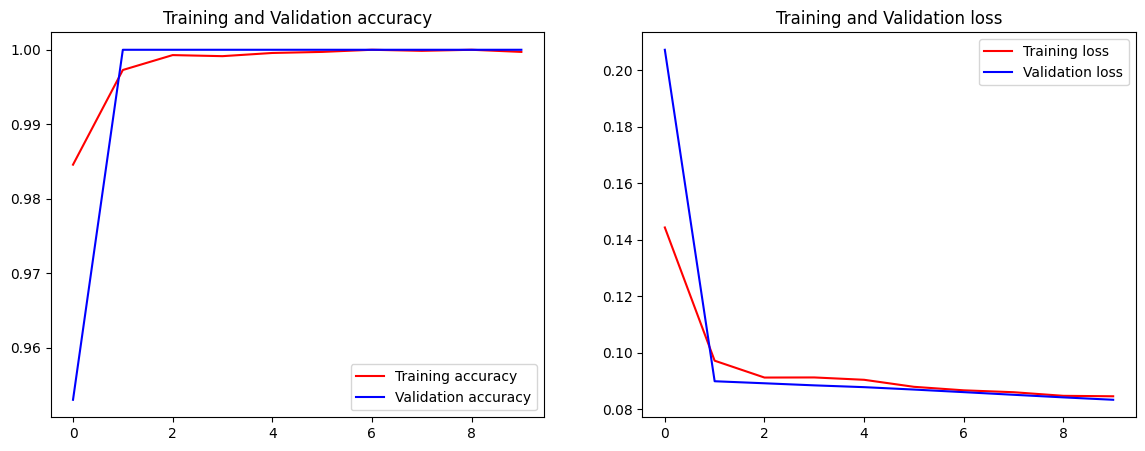

In [ ]:
# Test generator
test_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

plot_training_history(history)

125/125 [==============================] - 5s 35ms/step


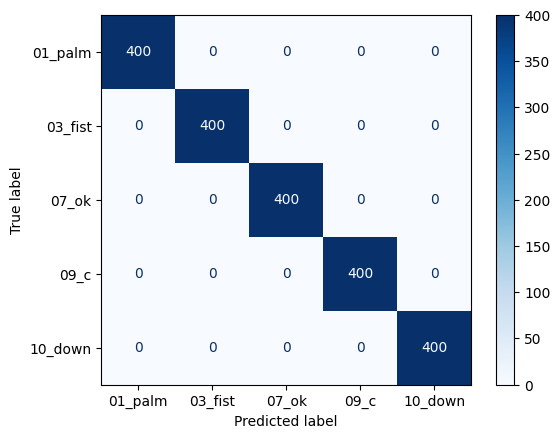

In [ ]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def print_confusion_matrix(model, test_generator):
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    y_true = test_generator.classes
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

print_confusion_matrix(model, test_generator)


In [ ]:
from sklearn.metrics import classification_report

# Generate and print classification report
def print_classification_report(model, test_generator):
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    y_true = test_generator.classes
    report = classification_report(y_true, y_pred, target_names=target_classes)
    print(report)

print_classification_report(model, test_generator)

125/125 [==============================] - 4s 36ms/step
              precision    recall  f1-score   support

     01_palm       1.00      1.00      1.00       400
     03_fist       1.00      1.00      1.00       400
       07_ok       1.00      1.00      1.00       400
        09_c       1.00      1.00      1.00       400
     10_down       1.00      1.00      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



From the results above, the fine-tuned model had achieved perfect performance in classifying the five hand gestures ( "fist" , "OK", "C", "palm", "down" ), with an accuracy of 100%.

### **Fourth Experiment: Multi-class Classification ( All Gestures )**

In the fourth experiment, we train the model to classify 10 hand gestures ( all gestures in the ["Hand Gesture Recognition Database"](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data) dataset ), which are "fist", "OK", "C", "palm", "down", "L", "fist_moved", "thumb", "index", and "palm_moved".

#### **Load and Preprocess the Data**

In [ ]:
# Define the path to the dataset
dataset_path = '/kaggle/input/leapgestrecog/leapGestRecog/'

# Define the target classes
target_classes = ['01_palm','02_l' ,'03_fist','04_fist_moved','05_thumb', '06_index', '07_ok','08_palm_moved', '09_c', '10_down']

# Load the data
X, y = load_data_path(target_classes, dataset_path)

In [ ]:
# Print the length of X and y
print(len(X), len(y))

20000 20000


In [ ]:
# Print the unique values of y
unique_labels = set(y)
print("Unique values of y:", unique_labels)

Unique values of y: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


After loading the image data, we perform a series of image processing steps on all images in the dataset. The applied operations include resizing, thresholding, blurring, and sharpening the images.

In [ ]:
# Preprocess all images
processed_images = []
for file_path in X:
    processed_images.append(preprocess_image(file_path))


len(processed_images)

20000

#### **Split the data**

In this step, we prepare the dataset for training by converting the data to numpy arrays and splitting it into training, validation, and test sets. The split ratio is 70% for the training set, 10% for the validation set, and 20% for the test set.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Convert lists to numpy arrays
processed_images = np.array(processed_images)
y = np.array(y)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(processed_images, y, test_size=0.3, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.6666, stratify=y_temp)

In [ ]:
# Print the shape of the image sets of the training, validation, and testing
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)

X_train.shape, X_valid.shape , X_test.shape

((14000, 250, 250, 3), (2000, 250, 250, 3), (4000, 250, 250, 3))

In [ ]:
# Print the shape of the labels for the training, validation, and test sets
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

y_train.shape, y_valid.shape , y_test.shape

((14000,), (2000,), (4000,))

Now, we create directories to organize and store preprocessed images for training, validation, and testing. This enables easy access and management of the dataset during model development and evaluation. In addition, the preprocessed images are saved for each of the sets.

In [ ]:
# Create directories
base_dir = '/kaggle/working/Ten_classes'
os.makedirs(f'{base_dir}/images/train/', exist_ok=True)
os.makedirs(f'{base_dir}/images/val/', exist_ok=True)
os.makedirs(f'{base_dir}/images/test/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/train/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/val/', exist_ok=True)
os.makedirs(f'{base_dir}/labels/test/', exist_ok=True)


# Save preprocessed images for training, validation, and testing
save_images(X_train, y_train, 'train')
save_images(X_valid, y_valid, 'val')
save_images(X_test, y_test, 'test')

#### **Model Building**

In this step, we fine-tune a pre-trained MobileNetV2 model for image classification. Fine-tuning involves initializing the MobileNetV2 model with weights pre-trained on the ImageNet dataset and then adding additional layers on top for the specific classification task, in our case the task is to classify different hand gestures. These additional layers include a dropout layer to prevent overfitting and a dense output layer with softmax activation function. The MobileNetV2 base model is kept trainable, allowing the weights to be updated during training to adapt to the new dataset while leveraging the knowledge learned from ImageNet. Following, the model is compiled with categorical crossentropy loss and RMSprop optimizer. Thereafter, the model is trained on the provided dataset for 10 epochs, with data augmentation techniques such as width and height shifting, along with rescaling of pixel values to help ensure genralization and reliabilty.

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is available


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the target classes
target_classes = ['01_palm','02_l' ,'03_fist','04_fist_moved','05_thumb', '06_index', '07_ok','08_palm_moved', '09_c', '10_down']

# Define model name and handle
model_name = "mobilenet_v2_140_224"
model_handle_map = {
    "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
}
model_image_size_map = {
    "mobilenet_v2_140_224": 224,
}
model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16  # Reduced batch size to conserve memory

# Create the base model from the pre-trained convnets
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Build the model
do_fine_tuning = True
print("Building model with", model_handle)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    Dropout(rate=0.3),
    Dense(len(target_classes), activation='softmax',
          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,) + IMAGE_SIZE + (3,))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

# Define base directory
base_dir = '/kaggle/working/Ten_classes/images'

# Train generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation generator
validation_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)



Selected model: mobilenet_v2_140_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
9406464/9406464 [==============================] - 2s 0us/step
Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              4363712   
                                                                 
 dropout (Dropout)           (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 10)                17930     
                                                                 
Total params: 4381642 (16.71 MB)
Trainable params: 4333706 (16.53 MB)
Non-trainable params: 47936 (187.25 KB)
_________________________________________________________________
Found 1400

#### **Model Evaluation**

After building the model, we evaluate its performance on the test dataset. The model is evaluated using the "accuracy" metric.

Found 4000 images belonging to 10 classes.
250/250 - 7s - loss: 0.0767 - accuracy: 1.0000 - 7s/epoch - 28ms/step
Test accuracy: 1.0


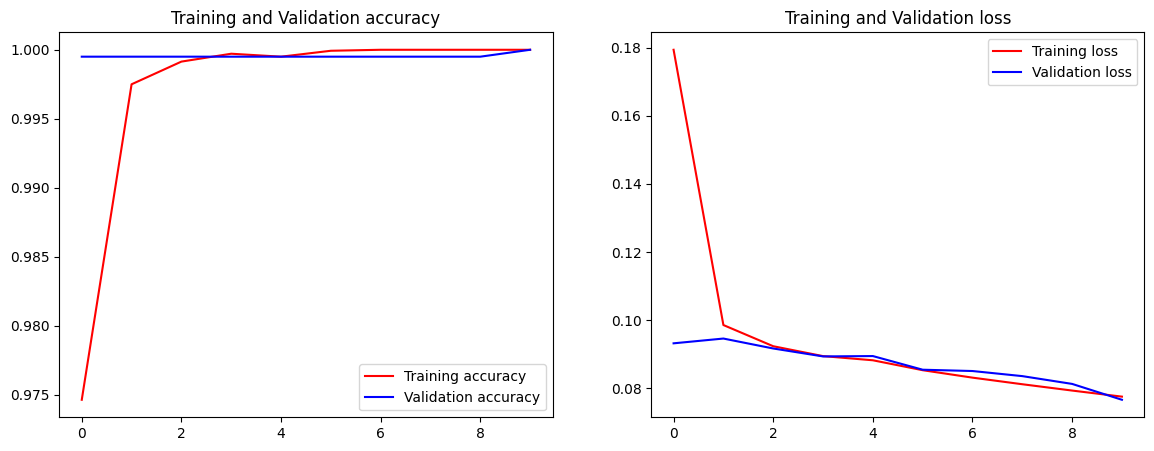

In [ ]:
# Test generator
test_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

plot_training_history(history)

250/250 [==============================] - 8s 31ms/step


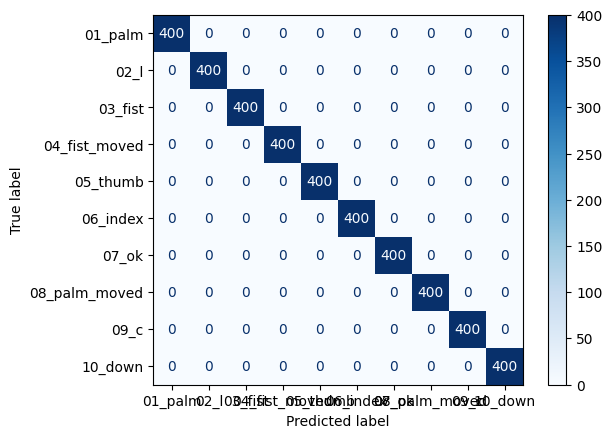

In [ ]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def print_confusion_matrix(model, test_generator):
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    y_true = test_generator.classes
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

print_confusion_matrix(model, test_generator)


In [ ]:
from sklearn.metrics import classification_report

# Generate and print classification report
def print_classification_report(model, test_generator):
    y_pred = np.argmax(model.predict(test_generator), axis=-1)
    y_true = test_generator.classes
    report = classification_report(y_true, y_pred, target_names=target_classes)
    print(report)

print_classification_report(model, test_generator)

250/250 [==============================] - 7s 29ms/step
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       400
         02_l       1.00      1.00      1.00       400
      03_fist       1.00      1.00      1.00       400
04_fist_moved       1.00      1.00      1.00       400
     05_thumb       1.00      1.00      1.00       400
     06_index       1.00      1.00      1.00       400
        07_ok       1.00      1.00      1.00       400
08_palm_moved       1.00      1.00      1.00       400
         09_c       1.00      1.00      1.00       400
      10_down       1.00      1.00      1.00       400

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



From the results above, the fine-tuned model had achieved perfect performance in classifying all hand gestures contained in the ["Hand Gesture Recognition Database"](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data) dataset, which are 10 Gestures ( "fist", "OK", "C", "palm", "down", "L", "fist_moved", "thumb", "index", and "palm_moved" ), with an accuracy of 100%.

## **Conclusion**

To conclude, this project aimed to develop a hand gesture recognition model utilizing computer vision, image processing, and deep learning techniques. Through a series of four experiments, the model progressively expanded its capability to distinguish between additional hand gestures. By fine-tuning the pretrained MobileNetV2 model on the ["Hand Gesture Recognition Database"](https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data) dataset obtained from Kaggle, remarkable results were achieved. Across all four experiments, the models demonstrated perfect performance, achieving a remarkable accuracy of 100%.

Hand gesture recognition is a challenging subject, and this project provides only a minor contribution to achieving the necessary outcomes in the field. As an extension of this work, we aim to build a comprehensive model that is able to recognize a larger number of gestures.

Throughout this project, we came to acknowledge that we must always take something away from each design, study, or experiment. We realized that we should always use errors as an opportunity to get better at what we do. Furthermore, we have enjoyed working together as a team and improved our cooperation and communication skills. While working on this project, we aimed to utilize and apply what we had learned in our computer vision studies, from the low-level processing methods, to the higher more advanced techniques.